In [61]:
# %matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

# Create t2tpa from Acces log data using a Sql quryyy

# load text tole_stat.csv; this file contains different user types and total counts
import csv
with open('features/t2tpa.csv', 'r') as f:
    A_temp = csv.reader(f)
    temp = list(A_temp)

print(temp[0]) # The column names

A = np.array(temp[1:]) # arrat of t2tpa
print(A.shape)
Enc_ID = A[:,1]  
#print(A[:,2] )

['jc_uid', 'pat_enc_csn_id_coded', 't2tpa']
(246, 3)


In [62]:

# Create the patient dictionary and extract TPA times for each encounter and put it in a dictionary

Pat_dic = {}

for id in Enc_ID:
    #print(id)
    #print(np.where(A[:,1]==id)[0])
    #print(A[np.where(A[:,1]==id)[0],2])
    t2tpa = int(A[np.where(A[:,1]==id)[0],2])
    pat_id = A[np.where(A[:,1]==id)[0],0]
    
    #print(t2tpa)
    if t2tpa < 60*10:
        Pat_dic[id] = {} #each patient has a dictionary
        Pat_dic[id]['t2tpa'] = t2tpa
        Pat_dic[id]['pat_id'] = pat_id

In [59]:
# Feature: import Num of transactions and add it to the patient dictionary

with open('features/num_tnx.csv', 'r') as f:
    A_temp = csv.reader(f)
    temp = list(A_temp)

print(temp[0]) # The column names

A = np.array(temp[1:]) # array of t2tpa


for id in Pat_dic.keys():
    if A[np.where(A[:,1]==id)[0],2].shape[0] > 0:
        num_actions = float(A[np.where(A[:,1]==id)[0],2])
        Pat_dic[id]['num_actions'] = num_actions
    else:
        print(id)
        Pat_dic[id]['num_actions'] = 0


['jc_uid', 'pat_enc_csn_id_coded', 'max_norm_num_tranx']
131042907349


(246,)
(246, 1)
(246, 1)


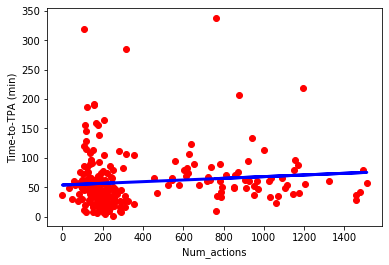

In [60]:
# plot num actions in terms of t2tpa
from sklearn.linear_model import LinearRegression as LR

Num_actions = np.array([Pat_dic[id]['num_actions'] for id in Pat_dic.keys()])
Time2tpa = np.array([Pat_dic[id]['t2tpa'] for id in Pat_dic.keys()])

D = np.where(Num_actions>-1)[0]
print(D.shape)

plt.scatter(Num_actions,Time2tpa,color='r')

# Linear regression plot
Num_actions = np.reshape(Num_actions,(-1,1))
Time2tpa = np.reshape(Time2tpa,(-1,1))

print(Num_actions.shape)
print(Time2tpa.shape)

Time2tpa_regr = LR().fit(Num_actions, Time2tpa).predict(Num_actions)
plt.plot(Num_actions,Time2tpa_regr, color='blue', linewidth=3)

plt.xlabel('Num_actions')
plt.ylabel('Time-to-TPA (min)')

plt.show()



In [65]:
# Feature: import Num of new patients and add it to the patient dictionary

with open('features/num_new_pat.csv', 'r') as f:
    A_temp = csv.reader(f)
    temp = list(A_temp)

print(temp[0]) # The column names

A = np.array(temp[1:]) # arrat of t2tpa


for id in Pat_dic.keys():
    if A[np.where(A[:,1]==id)[0],2].shape[0] > 0:
        num_actions = float(A[np.where(A[:,1]==id)[0],3])
        Pat_dic[id]['num_new_pat'] = num_actions
    else:
        #print(id)
        Pat_dic[id]['num_new_pat'] = 0



['jc_uid', 'pat_enc_csn_id_coded', 'max_num_new_pat_rate', 'sum_num_new_pat_rate']


(246,)
(246, 1)
(246, 1)


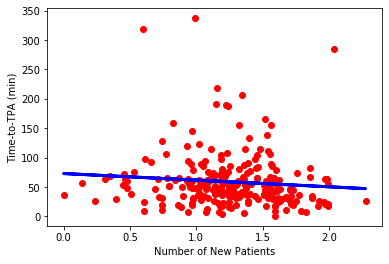

In [66]:
# plot num new patients in terms of t2tpa
from sklearn.linear_model import LinearRegression as LR

Num_new_pat = np.array([Pat_dic[id]['num_new_pat'] for id in Pat_dic.keys()])
Time2tpa = np.array([Pat_dic[id]['t2tpa'] for id in Pat_dic.keys()])

D = np.where(Num_new_pat>-1)[0]
print(D.shape)

plt.scatter(Num_new_pat,Time2tpa,color='r')

# Linear regression plot
Num_new_pat = np.reshape(Num_new_pat,(-1,1))
Time2tpa = np.reshape(Time2tpa,(-1,1))

print(Num_new_pat.shape)
print(Time2tpa.shape)

Time2tpa_regr = LR().fit(Num_new_pat, Time2tpa).predict(Num_new_pat)
plt.plot(Num_new_pat,Time2tpa_regr, color='blue', linewidth=3)

plt.xlabel('Number of New Patients')
plt.ylabel('Time-to-TPA (min)')

plt.show()
print('COMMENT: The number of users might be proportional to the number of patients')



In [68]:
# Feature: import Num of unique patients and add it to the patient dictionary

with open('features/num_unq_pat.csv', 'r') as f:
    A_temp = csv.reader(f)
    temp = list(A_temp)

print(temp[0]) # The column names

A = np.array(temp[1:]) # arrat of t2tpa


for id in Pat_dic.keys():
    if A[np.where(A[:,1]==id)[0],2].shape[0] > 0:
        num_actions = float(A[np.where(A[:,1]==id)[0],2])
        Pat_dic[id]['num_unq_pat'] = num_actions
    else:
        #print(id)
        Pat_dic[id]['num_unq_pat'] = 0




['jc_uid', 'pat_enc_csn_id_coded', 'max_num_unq_pat']


(241,)
(241, 1)
(241, 1)


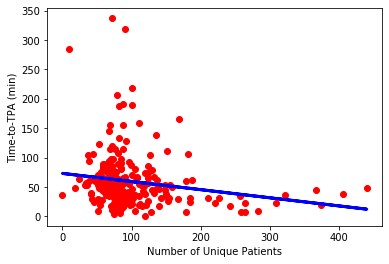

COMMENT: The number of users might be proportional to the number of patients


In [71]:
# plot feature
from sklearn.linear_model import LinearRegression as LR

X = np.array([Pat_dic[id]['num_unq_pat'] for id in Pat_dic.keys()])
Time2tpa = np.array([Pat_dic[id]['t2tpa'] for id in Pat_dic.keys()])

# remove outliers
D = np.where(X<500)[0]
print(D.shape)
X = X[D]
Time2tpa = Time2tpa[D]

plt.scatter(X,Time2tpa,color='r')

# Linear regression plot
X = np.reshape(X,(-1,1))
Time2tpa = np.reshape(Time2tpa,(-1,1))

print(X.shape)
print(Time2tpa.shape)

Time2tpa_regr = LR().fit(X, Time2tpa).predict(X)
plt.plot(X,Time2tpa_regr, color='blue', linewidth=3)

plt.xlabel('Number of Unique Patients')
plt.ylabel('Time-to-TPA (min)')

plt.show()

print('COMMENT: The number of users might be proportional to the number of patients')
